<a href="https://colab.research.google.com/github/MihailMV/Fruits-and-vegetables/blob/master/NN_fruits_and_vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
#import zipfile
import shutil
import numpy as np
import pandas as pd

from tqdm import tqdm

from PIL import Image

In [0]:
DIR = 'fruits_vegetables'
DIR_TRAIN = 'TRAIN'
DIR_VAL = 'VAL'
DIR_TEST = 'TEST'
IMG_SIZE = (224, 224)
MEAN = np.array([0.485, 0.456, 0.406])
STD = np.array([0.229, 0.224, 0.225])
BATCH_SIZE = 150

os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/kaggle/" 
pd.set_option('precision', 2)


In [89]:
os.system("kaggle datasets download -p " + DIR + " --unzip balalexv/fruits-vegetables-photos")

0

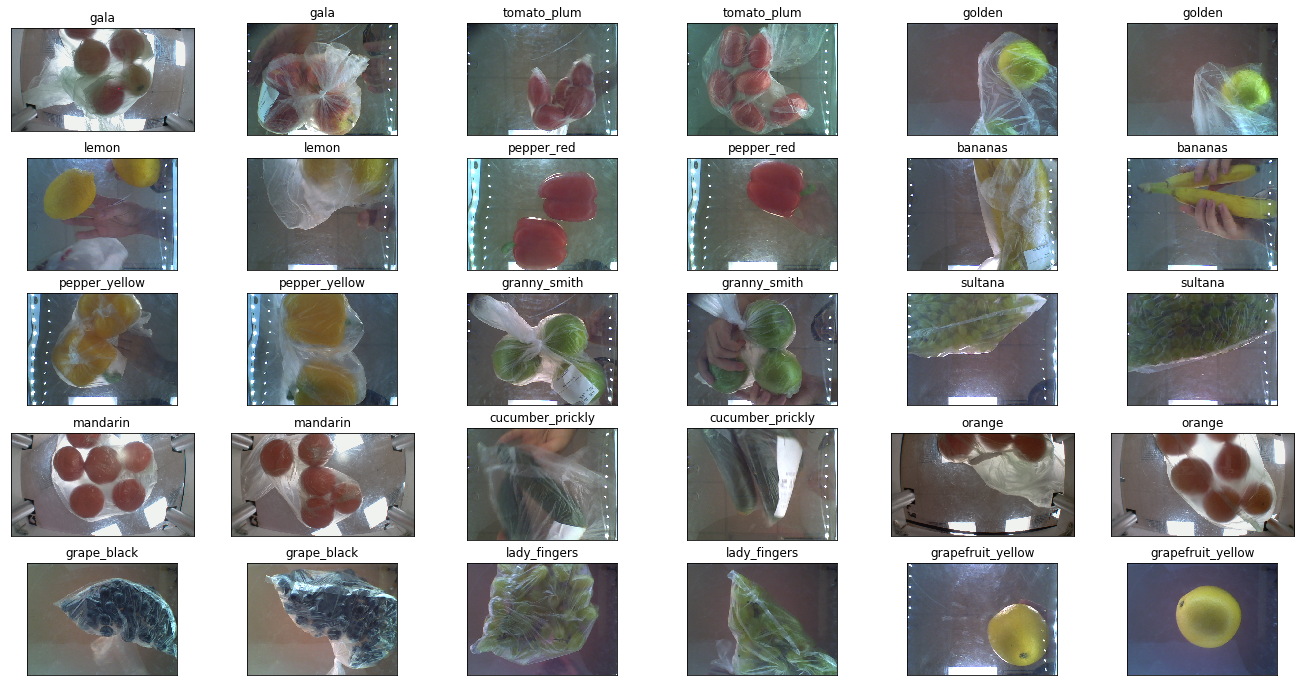

In [122]:
class_list = os.listdir(os.path.join(DIR,DIR_TRAIN))

fig=plt.figure(figsize=(23, 12))
fig.set(facecolor = 'white')

columns = 6
rows = 5
img = Image.open(os.path.join(DIR,DIR_TRAIN,class_name,os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))[num_photo]))

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    class_name = class_list[(i)//2]
    plt.imshow(Image.open(os.path.join(DIR,DIR_TRAIN,class_name,os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))[np.random.randint(len(os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))))])))
    plt.title(class_name)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [0]:
#shutil.rmtree(DIR)


In [0]:
os.makedirs(os.path.join(DIR, DIR_VAL), exist_ok=True)

class_list = os.listdir(os.path.join(DIR,DIR_TRAIN))
cnt_train_list = []
cnt_val_list = []
cnt_test_list = []

for class_name in class_list:
  os.makedirs(os.path.join(DIR, DIR_VAL, class_name), exist_ok=True)
  for f in os.listdir(os.path.join(DIR,DIR_TRAIN, class_name)):
    if (np.random.randint(1, 11) == 1):
      shutil.move(os.path.join(DIR,DIR_TRAIN, class_name,f), os.path.join(DIR,DIR_VAL,class_name,f))
  cnt_train_list.append(len(os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))))
  cnt_val_list.append(len(os.listdir(os.path.join(DIR,DIR_VAL, class_name))))
  cnt_test_list.append(len(os.listdir(os.path.join(DIR,DIR_TEST, class_name))))
  
df = pd.DataFrame({'CLASS':class_list, 'CNT_TRAIN':cnt_train_list, 'CNT_VAL':cnt_val_list, 'CNT_TEST':cnt_test_list})
del class_list, cnt_train_list, cnt_val_list, cnt_test_list

In [125]:
df

,CLASS,CNT_TRAIN,CNT_VAL,CNT_TEST
0,gala,533,58,9
1,tomato_plum,509,46,9
2,golden,255,30,9
3,lemon,683,70,9
4,pepper_red,113,15,9
5,bananas,631,76,9
6,pepper_yellow,156,18,9
7,granny_smith,398,41,9
8,sultana,487,62,9
9,mandarin,112,16,9


In [124]:
df.describe()

,CNT_TRAIN,CNT_VAL,CNT_TEST
count,15.00,15.00,15.0
mean,338.93,38.27,9.0
std,218.49,24.89,0.0
min,56.00,6.00,9.0
25%,159.00,17.50,9.0
50%,255.00,30.00,9.0
75%,521.00,60.00,9.0
max,683.00,78.00,9.0


In [0]:
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
import torchvision
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score

In [0]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(0.5,0.5,0.5),
    transforms.RandomRotation(degrees=90),
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD)
])

val_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(MEAN, STD)
])

train_dataset = torchvision.datasets.ImageFolder(os.path.join(DIR,DIR_TRAIN), train_transforms)
val_dataset = torchvision.datasets.ImageFolder(os.path.join(DIR,DIR_VAL), val_transforms)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)


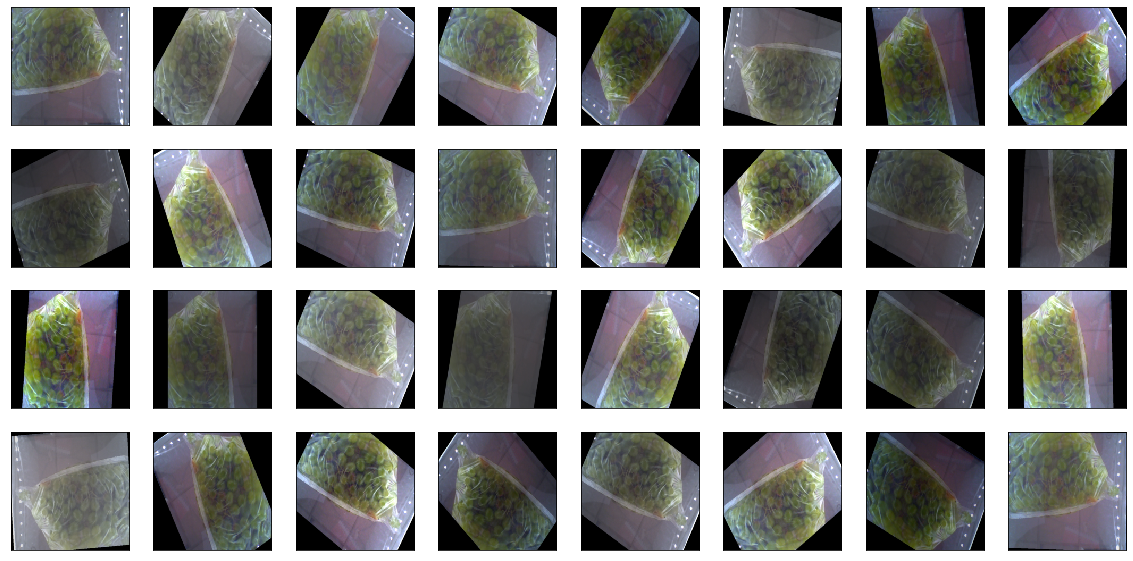

In [130]:
fig=plt.figure(figsize=(20, 10))
fig.set(facecolor = 'white')

columns = 8
rows = 4
class_name = 'sultana'
num_photo = 5
img = Image.open(os.path.join(DIR,DIR_TRAIN,class_name,os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))[num_photo]))

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    if (i == 0):
      plt.imshow((val_transforms(img).permute(1, 2, 0).numpy() * STD + MEAN).clip(0, 1))
    else:
      plt.imshow((train_transforms(img).permute(1, 2, 0).numpy() * STD + MEAN).clip(0, 1))
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [0]:
def train_model(model, fun_loss, optimizer, scheduler, cnt_epochs, hist = None):
  if (hist == None):
    hist = {'Epochs': [], 'Train loss': [],'Train F1': [],'Val loss': [],'Val F1': []}
    start_epoch = 1
  else:
    start_epoch = hist['Epochs'][-1]+1
  type_trains = ['Train','Val']
  for epoch in range(start_epoch, start_epoch+cnt_epochs):
    # Train
    for id_type_train in range(2):
      #print(type_trains[id_type_train], flush=True)
      loss = 0.
      preds_class_all = torch.tensor([], dtype=int)
      labels_all = torch.tensor([], dtype=int)
      if (id_type_train == 0):
        model.train()
        dataloader = train_dataloader
      else:
        model.eval()
        dataloader = val_dataloader
      #for inputs, labels in tqdm(dataloader):
      for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(id_type_train == 0):
          preds = model(inputs)
          loss_batch = fun_loss(preds, labels)
          preds_class = preds.argmax(dim=1)
          if (id_type_train == 0):
            loss_batch.backward()
            optimizer.step()
          loss += loss_batch.item()
          preds_class_all = torch.cat([preds_class_all, preds_class.cpu()])
          labels_all = torch.cat([labels_all, labels.data.cpu()])
      
      loss /= len(dataloader)
      if (id_type_train == 0):
        scheduler.step(loss)
        hist['Epochs'].append(epoch)  
      hist[f'{type_trains[id_type_train]} loss'].append(loss)
      hist[f'{type_trains[id_type_train]} F1'].append(f1_score(labels_all, preds_class_all, average='macro'))
        
    print(f"Epoch {epoch}/{start_epoch+cnt_epochs-1}: Train: Loss: {hist['Train loss'][-1]:.4f}, F1 score: {hist['Train F1'][-1]:.4f}   Val: Loss: {hist['Val loss'][-1]:.4f}, F1 score: {hist['Val F1'][-1]:.4f}")
  return model, hist

In [0]:
model = models.resnet50(pretrained=True)

#for param in model.parameters():
#    param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, len(train_dataset.classes))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

cl_cnt = dict(df[['CLASS','CNT_TRAIN']].values)
cl_weight = max([cnt for cnt in cl_cnt.values()]) / torch.tensor([cl_cnt[cl] for cl in train_dataset.classes], dtype=float, device=device)

loss = torch.nn.CrossEntropyLoss(weight=cl_weight.float())
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4,  amsgrad=True)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.3, patience=3, threshold= 0.01, verbose=True)

In [133]:
model, hist = train_model(model, loss, optimizer, scheduler, cnt_epochs=2)

Epoch 1/2: Train: Loss: 1.0275, F1 score: 0.6952   Val: Loss: 0.2384, F1 score: 0.8720
Epoch 2/2: Train: Loss: 0.1252, F1 score: 0.9500   Val: Loss: 0.0778, F1 score: 0.9531


In [0]:
#model, hist = train_model(model, loss, optimizer, scheduler, num_epochs=3, hist=hist)


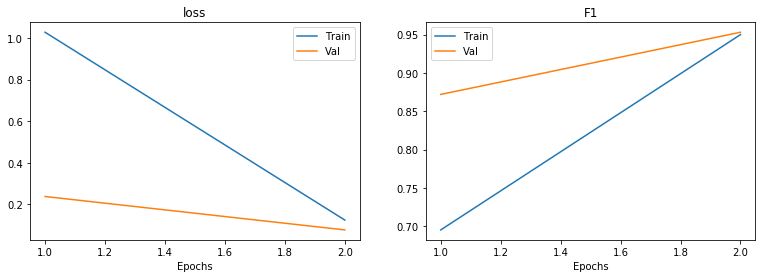

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
fig.set(facecolor = 'white')

funs = ['loss','F1']
type_trains = ['Train','Val']

for fun in funs:
  for type_train in type_trains:
    axes[funs.index(fun)].plot(hist['Epochs'], hist[f'{type_train} {fun}'], label=type_train)
  axes[funs.index(fun)].set_title(fun)
  axes[funs.index(fun)].set_xlabel('Epochs')
  axes[funs.index(fun)].legend()
plt.show()

In [0]:
test_dataset = torchvision.datasets.ImageFolder(os.path.join(DIR,DIR_TEST), val_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

model.eval()
preds_class_all = []
labels_all =  []

for inputs, labels in test_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
        preds_class = preds.argmax(dim=1)
        preds_class_all = preds_class_all + preds_class.cpu().tolist()
        labels_all = labels_all + labels.data.cpu().tolist()

del inputs, labels

df_сonfusion_matrix = pd.DataFrame({
    'True':[train_dataset.classes[i] for i in labels_all]
    , 'Predict':[train_dataset.classes[i] for i in preds_class_all]
    })

df_test_score = pd.DataFrame({
    'Class':train_dataset.classes
    ,'F1_score':f1_score(labels_all, preds_class_all, average=None)
    ,'Precision':precision_score(labels_all, preds_class_all, average=None)
    ,'Recall':recall_score(labels_all, preds_class_all, average=None)
  })

In [142]:
pd.crosstab(df_сonfusion_matrix['True'], df_сonfusion_matrix['Predict']).style.background_gradient(cmap='RdYlGn')

Predict,bananas,cucumber_prickly,gala,golden,granny_smith,grape_black,grapefruit_yellow,lady_fingers,lemon,mandarin,orange,pepper_red,pepper_yellow,sultana,tomato_plum
True,,,,,,,,,,,,,,,
bananas,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cucumber_prickly,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0
gala,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0
golden,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
granny_smith,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0
grape_black,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0
grapefruit_yellow,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
lady_fingers,0,0,0,0,0,0,0,8,0,0,0,0,0,1,0
lemon,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0


In [143]:
df_test_score.pivot_table(values=['F1_score','Precision','Recall'], index='Class', \
                aggfunc='mean', margins=True, margins_name='Total') \
                .style.background_gradient(cmap='RdYlGn')

,F1_score,Precision,Recall
Class,,,
bananas,1,1,1
cucumber_prickly,1,1,1
gala,1,1,1
golden,1,1,1
granny_smith,1,1,1
grape_black,1,1,1
grapefruit_yellow,1,1,1
lady_fingers,0.94,1,0.89
lemon,1,1,1


In [144]:
!nvidia-smi

Tue Mar  3 13:32:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    33W / 250W |  14995MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
def Occlusion(model, img, class_id, batch_size = 32, size_square = 20, size_step = 5):
  img = img.view([1] + list(img.size()))
  len_row = img.size()[2] // size_step + 1
  len_col = img.size()[3] // size_step + 1
  confidence_predict = []
  i = 0
  j = 0

  for num_batcn in range(1, (len_row * len_col) // batch_size + 2):
    cnt_img = batch_size - max(0,num_batcn * batch_size - (len_row * len_col))
    imgs = torch.cat([img for i in range(cnt_img)])  
    for num_img in range(cnt_img):
      imgs[num_img, :, i*size_step:i*size_step+size_square, j*size_step:j*size_step+size_square] *= 0
      j += 1
      if (j == len_col):
        i += 1
        j = 0 
    confidence_predict = np.concatenate([confidence_predict ,list(torch.nn.functional.softmax(model(imgs).data ,dim=1)[:,class_id].cpu().numpy())])


  new_img = torch.zeros(img.size()[2:])
  new_img_cnt = torch.zeros(img.size()[2:])

  #print(confidence_predict.min(), confidence_predict.max())
  for i in range(len_row):
    for j in range(len_col):
      new_img[i*size_step:i*size_step+size_square, j*size_step:j*size_step+size_square] += confidence_predict[i* len_row + j]
      new_img_cnt[i*size_step:i*size_step+size_square, j*size_step:j*size_step+size_square] += 1

  new_img /= new_img_cnt
  #show_input(img[0].cpu())
  #new_img = (new_img - new_img.min()) / (new_img.max() - new_img.min())
  #show_input(torch.cat([1-new_img.view([1] + list(img.size()[2:])), torch.zeros([1] + list(img.size()[2:])), new_img.view([1] + list(img.size()[2:]))]), normalize=False)
  #img_Saliency
  img2 = img.clone()
  img2.requires_grad = True

  img = img[0].cpu().permute(1, 2, 0).numpy()
  img = STD * img + MEAN
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
  fig.set(facecolor = 'white')
  axes[0].imshow(img.clip(0, 1))
  axes[0].set(title = 'Original', xticks=[], yticks=[])


  im = axes[2].imshow(new_img, cmap='RdBu')
  axes[2].set(title = 'Occlusion', xticks=[], yticks=[])
  fig.colorbar(im, ax=axes.ravel().tolist())
  
  
  optimizer = torch.optim.Adam([img2], lr=1.0e-1, weight_decay = 0.05, amsgrad=True)
  optimizer.zero_grad()
  loss_value = loss(model(img2), torch.tensor([class_id]).to(device))
  loss_value.backward()
  optimizer.step()
  new_img = -img2.grad.abs().sum(dim=(0,1)).cpu()
  new_img = new_img - new_img.median() / 2
  new_img = new_img.data.relu()
  im2 = axes[1].imshow(new_img)
  axes[1].set(title = 'Saliency', xticks=[], yticks=[])
 
  plt.show()



    #plt.imshow(image.clip(0, 1))
    #plt.title(title)
    
    #plt.pause(0.001)


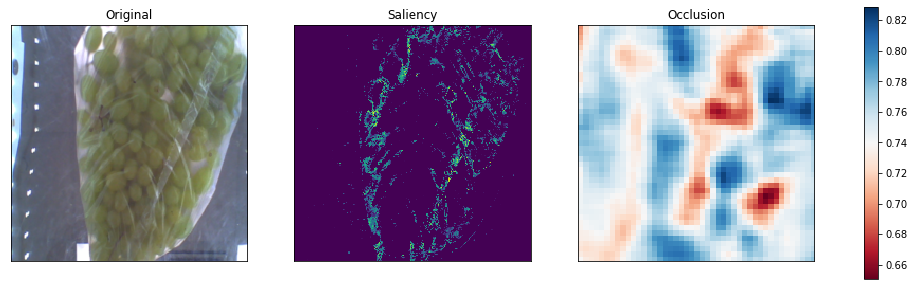

In [0]:
num_photo = 99
img = inputs[num_photo]
class_id = labels[num_photo].item()
Occlusion(model, img, class_id, batch_size = 150, size_square = 20, size_step = 5)


In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(random_state=17)


In [0]:
img = Image.open(os.path.join(DIR,DIR_TRAIN,class_name,os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))[num_photo]))

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)
    class_name = class_list[(i)//2]
    plt.imshow(Image.open(os.path.join(DIR,DIR_TRAIN,class_name,os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))[np.random.randint(len(os.listdir(os.path.join(DIR,DIR_TRAIN, class_name))))])))
    plt.title(class_name)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [0]:
      plt.imshow((val_transforms(img).permute(1, 2, 0).numpy() * STD + MEAN).clip(0, 1))


In [0]:
p = []
labels_all = []

for class_name in os.listdir(os.path.join(DIR,DIR_TEST)):
  for file_name in os.listdir(os.path.join(DIR,DIR_TEST, class_name)):
    p.append(np.array(val_transforms(Image.open(os.path.join(DIR,DIR_TEST,class_name,file_name))).view(-1)))
    labels_all.append(class_name)

p = np.array(p)


In [178]:
p.shape

(135, 150528)

In [0]:
tsne_rep = tsne.fit_transform(p)
tsne_rep2 = tsne.fit_transform(preds)


In [0]:
pal = sns.color_palette("hls", 15)
cols = []
for i in range(15):
  for j in range(9):
    cols.append(pal[i])

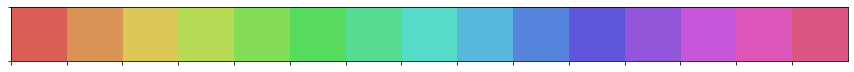

In [181]:
sns.palplot(pal)

In [0]:
sns.scatterplot(x="total_bill", y="tip", hue="time",
                     data=tips)

In [0]:
?sns.scatterplot

<function matplotlib.pyplot.show>

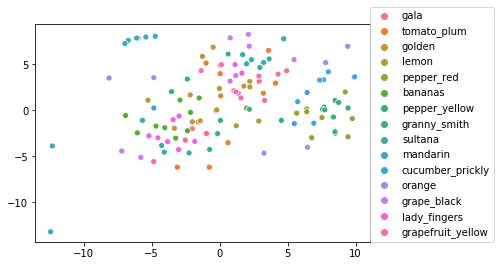

In [292]:
sns.scatterplot(x=tsne_rep[:, 0], y=tsne_rep[:, 1], hue=labels_all)
plt.legend(loc = (1, 0))
plt.show

<function matplotlib.pyplot.show>

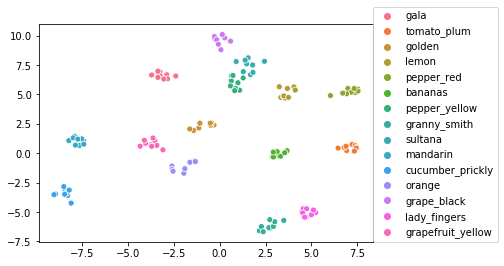

In [293]:

sns.scatterplot(x=tsne_rep2[:, 0], y=tsne_rep2[:, 1], hue=labels_all)
plt.legend(loc = (1, 0))
plt.show


In [0]:
del inputs, labels, preds, preds_class


In [0]:
?plt.scatter

In [0]:
test_dataset = torchvision.datasets.ImageFolder(os.path.join(DIR,DIR_TEST), val_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False, num_workers=8)

model.eval()

preds = np.array([])
for inputs, labels in test_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
      if (preds.shape[0] == 0):
        preds = np.array(model(inputs).cpu().data)
      else:
        preds = np.concatenate([preds, np.array(model(inputs).cpu().data)])


#del inputs, labels, preds, preds_class


In [262]:
np.array(model(inputs).cpu().data).shape

(10, 2048)

In [264]:
preds.shape


(135, 2048)

In [0]:
model.fc = torch.nn.Linear(2048, 2048)


model.fc.weight.data = torch.eye(2048)


In [244]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [240]:
model.fc.weight.data

tensor([[-0.0080, -0.0113, -0.0211,  ..., -0.0029,  0.0159,  0.0072],
        [ 0.0053,  0.0098,  0.0091,  ...,  0.0085, -0.0055,  0.0066],
        [ 0.0014, -0.0125,  0.0219,  ..., -0.0148, -0.0004, -0.0161],
        ...,
        [-0.0148, -0.0190, -0.0026,  ..., -0.0114, -0.0105,  0.0217],
        [ 0.0042, -0.0007, -0.0026,  ...,  0.0177,  0.0083, -0.0024],
        [ 0.0014, -0.0033, -0.0211,  ..., -0.0015, -0.0174, -0.0009]])

In [238]:
torch.eye(2048).shape

torch.Size([2048, 2048])

In [207]:
!nvidia-smi

Tue Mar  3 14:13:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    33W / 250W |  16211MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  